# 기본 패키지


* 1.기본
```python
import numpy as np # numpy 패키지 가져오기(기본패키지)
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
```

* 2.데이터 가져오기
```python
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기
```

* 3.데이터 전처리
```python
from sklearn.preprocessing import StandardScaler # 연속변수의 범주화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화
```


* 4. 훈련/검증용 데이터 분리
```python
from sklearn.model_selection import train_test_split # 훈련용과 검증용 데이터 분리
```

* 5.분류모델구축
```python
from sklearn.tree import DecisionTreeClassifier # 결정트리
from sklearn.naive_bayes import GaussianNB # 나이브 베이즈
from sklearn.neighbors import KNeighborsClassifier # K-NN(K-최근접 이웃)
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.ensemble import BaggingClassifier # 앙상블
from sklearn.linear_model import Perceptron # 퍼셉트론
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.svm import SVC # 서포트 백터 머신(SVM)
from sklearn.neural_network import MLPClassifier #다층인공신경망
```

* 6.모델검정
```python
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer # 정확도, 민감도
from sklearn.metrics import roc_curve # ROC 곡선 그리기
```

* 7.최적화
```python
from sklearn.model_selection import cross_validate # 교차타당도
from sklearn.pipeline import make_pipeline # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선,
from sklearn.model_selection import GridSearchCV # 9.하이퍼파라미터 튜닝
```
---
### Jupyter Notebook 기본 단축키
* Shift + ENter 키를 누르면 셀이 실행되고 커서가 다음셀로 이동한다.
* Enter 키를 누르면 다시 편집상태로 돌아온다.
* ESC 키를 누르고
    * a키를 누르면 위에 셀 추가
    * b키를 누르면 아래 셀 추가
    * dd키를 누르면 셀 삭제
    * m키를 누르면 마크다운
    * y키를 누르면 코드
    
---
### Markdown 양식
* 챕터 제목은 #
* 부챕터 제목은 ##
* 소챕터 제목은 ###

# Ch02. **통계학습** 
## 2.2 모델의 정확도 평가
## 학습목표
*  fitting, bias-var trade-off)
*  Bayes Classifier
*  KNN
___
### 2.2.1 적합 품질 측정

모델의 정확도를 평가하기 위해 회귀 설정에서 일반적으로 사용되는 평균제곱오차(MSE)

(1) 훈련 MSE
$$MSE=\frac{1}{n}\sum_{i=1}^{n} (y_{i}-\hat{f}(x_{i}))^{2}$$

일반적으로 기계학습을 할때, 훈련(train)데이터와 검정(test)데이터를 나눈다. 이때 (1)의 MSE는 훈련 데이터를 사용하여 계산되기 때문에 정확히는 train MSE 라고 한다.

___
### 2.2.2 편향-분산 trade off
편향과 분산은 절충됨.

**under fitting** : 모델이 너무 단순, **고편향**됨. 모델이 모든 특징을 적절히 설명할 수 있을 만큼 유연성이 충분하지 않다.


**over fitting** : 모델이복잡, **과적합**됨. 모델이 모든 특징을 세밀하게 설명할 수 있을 만큼 유연하지만, 훈련 데이터의 잡음(noise)까지 반영함. 따라서 새로운 데이터가 들어왔을 때 예측오차가 커지는 문제가 발생.

---
### 2.2.3 Model(Bayes Classifier, KNN)

**Bayes Classifier(베이즈 분류기)**

모수적추정 : 주어진 데이터 X에 대한 Y의 조건부분포에 대한 '사전 정보'가 필요

ex) 정규 분포, 포아송 분포, 카이제곱 분포 등등

데이터가 많을 수록 옳은 결정을 할 확률이 올라감. 사전 확률을 지속적으로 업데이트하는 방법.

* Navie Bayes(나이브 베이즈 분류기법) : 추가되는 사후확률을 이어서 곱하여 정보를 추가하는 단순한 기법

**KNN(k-최인접이웃)**
비모수적추정 : 주어진 데이터 X에 대한 Y의 조건부분포에 대한 '사전 정보'가 필요하지 않음.

KNN 분류기는 X에 대한 Y의 조건부분포를 추정하여 가장 높은 추정확률을 가지는 클래스로 관측치를 분류한다.

## **실습**
---
**bias-var trade off** 

overfitting & underfitting
```python
    #package load
from sklearn.preprocessing import PolynomialFeatures # 차원 조정
from sklearn.linear_model import LinearRegression    # 선형 모형
from sklearn.pipeline import make_pipeline           # 파이프라인 패키지
import numpy as np                                   # 기본 패키지

    #random date generate
np.random.seed(1)                                    # 시드 고정
X = np.random.rand(40, 1) ** 2                       # 40행, 1열
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40) # np.random.randn 을 사용하여 무작위 40개 값 생성

    # plot style package
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

    # 그림
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)   # -0.1에서 1.1 사이에 500개 균등하게 구간 나누고, -1,1의 2차원 reshpae

fig = plt.figure(figsize=(12, 10))
for i, degree in enumerate([1, 3, 5, 10], start=1):  # 1, 3, 5, 10 의 차원(총4개), 1부터 시작하는 인덱스
    ax = fig.add_subplot(2, 2, i)                    # 2,2,1/2,2,2/2,2,3/2,2,4
    ax.scatter(X.ravel(), y, s=15)                   # 산점도 그리기
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression())\
             .fit(X, y).predict(X_test)              # 파이프라인 만들기
    ax.plot(X_test.ravel(), y_test, label='degree{0}'.format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc='best');
    
    # 검증 곡선
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

np.random.seed(1)
X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40)

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

train_score, val_score = (make_pipeline(PolynomialFeatures(degree=2),\
                                        LinearRegression()),\
                          X, y, "polynomialfeatures__degree", degree, cv=7)

plt.figure(figsize=(8, 5))
plt.plot(degree, np.median(train_score, 1), "b-", label="training score")
plt.plot(degree, np.median(val_score, 1), "r-", label="validation score")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")
plt.legend(loc="best");

    # 검증 곡선에서 degree(복잡도)= 3 
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)

plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = make_pipeline(PolynomialFeatures(degree=3), LinearRegression()).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);
```

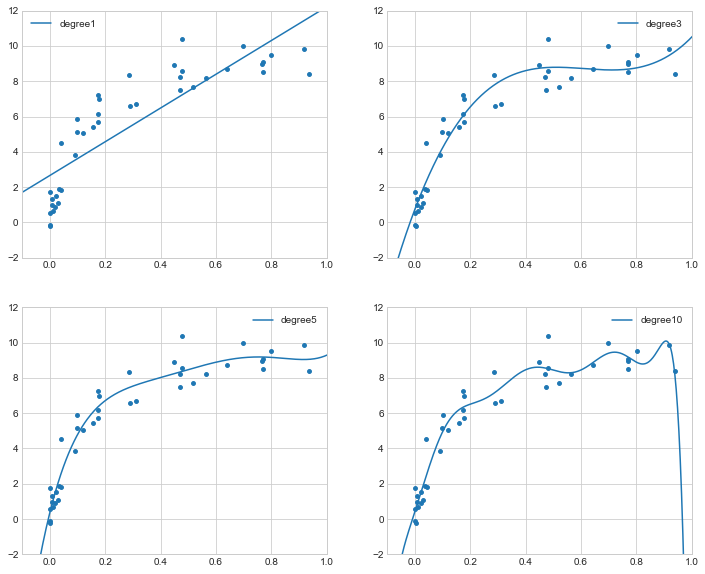

In [6]:
#실습 : overfitting & underfitting
from sklearn.preprocessing import PolynomialFeatures # 차원 조정
from sklearn.linear_model import LinearRegression    # 선형 모형
from sklearn.pipeline import make_pipeline           # 파이프라인 패키지
import numpy as np                                   # 기본 패키지

#random date generate
np.random.seed(1)                                    # 시드 고정
X = np.random.rand(40, 1) ** 2                       # 40행, 1열
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40) # np.random.randn 을 사용하여 무작위 40개 값 생성

# plot style package
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

# 그림
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)   # -0.1에서 1.1 사이에 500개 균등하게 구간 나누고, -1,1의 2차원 reshpae

fig = plt.figure(figsize=(12, 10))
for i, degree in enumerate([1, 3, 5, 10], start=1):  # 1, 3, 5, 10 의 차원(총4개), 1부터 시작하는 인덱스
    ax = fig.add_subplot(2, 2, i)                    # 2,2,1/2,2,2/2,2,3/2,2,4
    ax.scatter(X.ravel(), y, s=15)                   # 산점도 그리기
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression())\
             .fit(X, y).predict(X_test)              # 파이프라인 만들기
    ax.plot(X_test.ravel(), y_test, label='degree{0}'.format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc='best');

C:\Users\ahdal\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


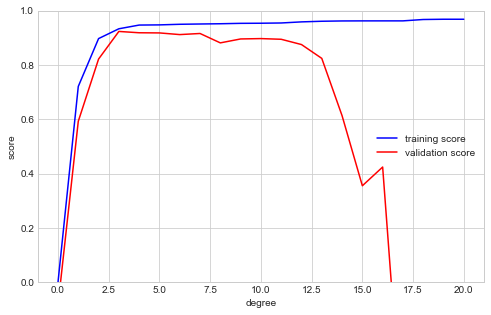

In [66]:
# 검증 곡선
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

np.random.seed(1)
X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40)

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

train_score, val_score = validation_curve\
(make_pipeline(PolynomialFeatures(degree=2),\
                               LinearRegression()),\
                 X, y, "polynomialfeatures__degree", degree, cv=7)

plt.figure(figsize=(8, 5))
plt.plot(degree, np.median(train_score, 1), "b-", label="training score")
plt.plot(degree, np.median(val_score, 1), "r-", label="validation score")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")
plt.legend(loc="best");

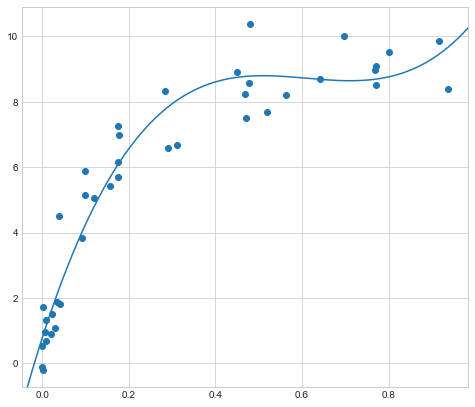

In [67]:
    # 검증 곡선에서 degree(복잡도)= 3 
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)
plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = make_pipeline(PolynomialFeatures(degree=3), LinearRegression()).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);

# 예제 : KNN classifier with iris data 

## **예제코드**
---
### 전처리
#### package load
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
```
#### data load and summarize
```python
iris = pd.read_csv('iris.csv')
iris.head()
iris.tail()
iris.shape
iris['variety'].value_counts()
iris.columns
iris.values
iris.info() # stata의 tabulate
iris.describe() # stata의 summarize, detail
iris.describe(include='all')
```
#### dataframe
```python
X = iris.iloc[:,:4] # all row, 4th까지 column을 X에 넣기
X.head()
y = iris.iloc[:,-1] # 모든 row, 맨끝의 column을 y에 넣기
y.head()
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]
```

---
### 분석
#### Train, Test Split
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # test_size=0.3 검증을 30% 데이터로 훈련을 70% 데이터로
y_test.shape
```
#### Training and Predicting
```python
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1=knnmodel.predict(X_test)
```
---
### 검정
#### Accuracy

```python
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_predict1)
acc
```
#### Confusion Matrix
```python
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values, y_predict1)
cm
```

```python
cunfmat = pd.DataFrame(confusion_matrix(y_test, y_predict1),
                        index=['True[setosa]','True[versicolor]','True[virginica]'],
                        columns=['Predict[setosa]', 'Predict[versicolor]', 'Predict[virginica]']) # 순서가 중요
cunfmat
```

#### Output Visualization
```python
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])
prediction_output.transpose()
```

```python
prediction_output.iloc[0,:].value_counts()
```

```python
print('잘못 분류된 샘플 개수: %d' % (y_test != y_predict1).sum()) # 뒤에 있는%를 앞에 있는 %에 넣는다는 의미
print('정확도: %.3f' % accuracy_score(y_test, y_predict1)) # 소수점 3째자리 실수로 넣기
```

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [63]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [21]:
iris.shape

(150, 5)

In [23]:
iris['variety'].value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

In [24]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [25]:
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'Setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Setosa'],
       [5.1, 3.3, 1.7, 0.5, 'Setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Setosa'],
       [5.0, 3.0, 1.6, 0.

In [26]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
iris.describe(include='all')

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [29]:
X = iris.iloc[:,:4] 
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
y = iris.iloc[:,-1]
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [34]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

# Train, Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
y_test.shape

(45,)

# Training and Predicting

In [39]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1=knnmodel.predict(X_test)

# Accuracy

In [40]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_predict1)
acc

0.9777777777777777

# Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values, y_predict1)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [51]:
cunfmat = pd.DataFrame(confusion_matrix(y_test, y_predict1),
                        index=['True[setosa]','True[versicolor]','True[virginica]'],
                        columns=['Predict[setosa]', 'Predict[versicolor]', 'Predict[virginica]']) # 순서가 중요
cunfmat

,Predict[setosa],Predict[versicolor],Predict[virginica]
True[setosa],14,0,0
True[versicolor],0,18,0
True[virginica],0,1,12


# Output Visualization

In [55]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])
prediction_output.transpose()

,y_test,y_predict1
0,Setosa,Setosa
1,Versicolor,Versicolor
2,Versicolor,Versicolor
3,Setosa,Setosa
4,Virginica,Virginica
5,Versicolor,Versicolor
6,Virginica,Virginica
7,Setosa,Setosa
8,Setosa,Setosa
9,Virginica,Virginica


In [54]:
prediction_output.iloc[0,:].value_counts()

Versicolor    18
Setosa        14
Virginica     13
Name: y_test, dtype: int64

In [60]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_predict1).sum()) # 뒤에 있는%를 앞에 있는 %에 넣는다는 의미
print('정확도: %.3f' % accuracy_score(y_test, y_predict1)) # 소수점 3째자리 실수로 넣기

잘못 분류된 샘플 개수: 1
정확도: 0.978


    * TPR = True Positive Rate : 민감도(sensitvity) = 재현율(Recall) = 3/4
    실제값 중에 잘 맞춘것 = TP/P
    * FPR = False Positive Rate 
    예측값 중에 잘 맞춘것 = FP/N
    *민감도(=TPR)와 특이도(=1-FPR)

    *정밀도=TP/(TP+FP)=3/4
* True : TN/TP, True Negative, True Positive
* Predict : PN/PP,

* F1 = 2*(재현율*정밀도)/(재현율+정밀도)=2*(0.75 * 0.75)/(0.75+0.75)=0.75

In [ ]:
![python image2](https://github.com/minkim1423/minkim1423.github.io/blob/main/output_3_0.png?raw=true)
![python image2](https://github.com/minkim1423/minkim1423.github.io/blob/main/output_4_1.png?raw=true)
![python image2](https://github.com/minkim1423/minkim1423.github.io/blob/main/output_5_0.png?raw=true)